<a href="https://www.kaggle.com/code/peacehegemony/exploring-imdb-top-200-films?scriptVersionId=118692386" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np



# Load the dataset
df = pd.read_csv('/kaggle/input/imdb-top-200-films/top_movies.csv')

Now that we have our dataset loaded, let's take a look at the first few rows to get a sense of what it looks like.

In [2]:
df.head()

,title,year,public,duration,production,scenario
0,The Shawshank Redemption,1994,R,2h 22m,Frank Darabont,"Stephen King(based on the short novel ""Rita Ha..."
1,The Godfather,1972,R,2h 55m,Francis Ford Coppola,Mario Puzo(screenplay by)Francis Ford Coppola(...
2,The Dark Knight,2008,PG-13,2h 32m,Christopher Nolan,Jonathan Nolan(screenplay)Christopher Nolan(sc...
3,The Godfather Part II,1974,R,3h 22m,Francis Ford Coppola,Francis Ford Coppola(screenplay by)Mario Puzo(...
4,12 Angry Men,1957,Approved,1h 36m,Sidney Lumet,"Reginald Rose(teleplay ""Twelve Angry Men"")"


This will output the first five rows of the dataset, along with the column names. As we can see, the columns in this dataset include:

Title: The title of the film.
Year: The year in which the film was released.
Public: The intended audience for the film, such as children or adults.
Duration: The length of the film in minutes.
Production: The production company or companies responsible for producing the film.
Scenario: The writer or writers responsible for the film's screenplay.
Now that we have a better understanding of the structure of our dataset, let's start exploring it further.

One interesting thing we might want to know is the distribution of film years in the top 200 films on IMDb. To do this, we can use the value_counts method on the year column of our dataset.

In [3]:
df['year'].value_counts()

1995    7
1957    6
1994    5
2003    5
1999    5
       ..
1971    1
1944    1
1987    1
1973    1
1924    1
Name: year, Length: 82, dtype: int64

This will output a count of the number of films in each year.

We can also use visualization libraries like matplotlib or seaborn to create a bar chart to visualize the year distribution more clearly.

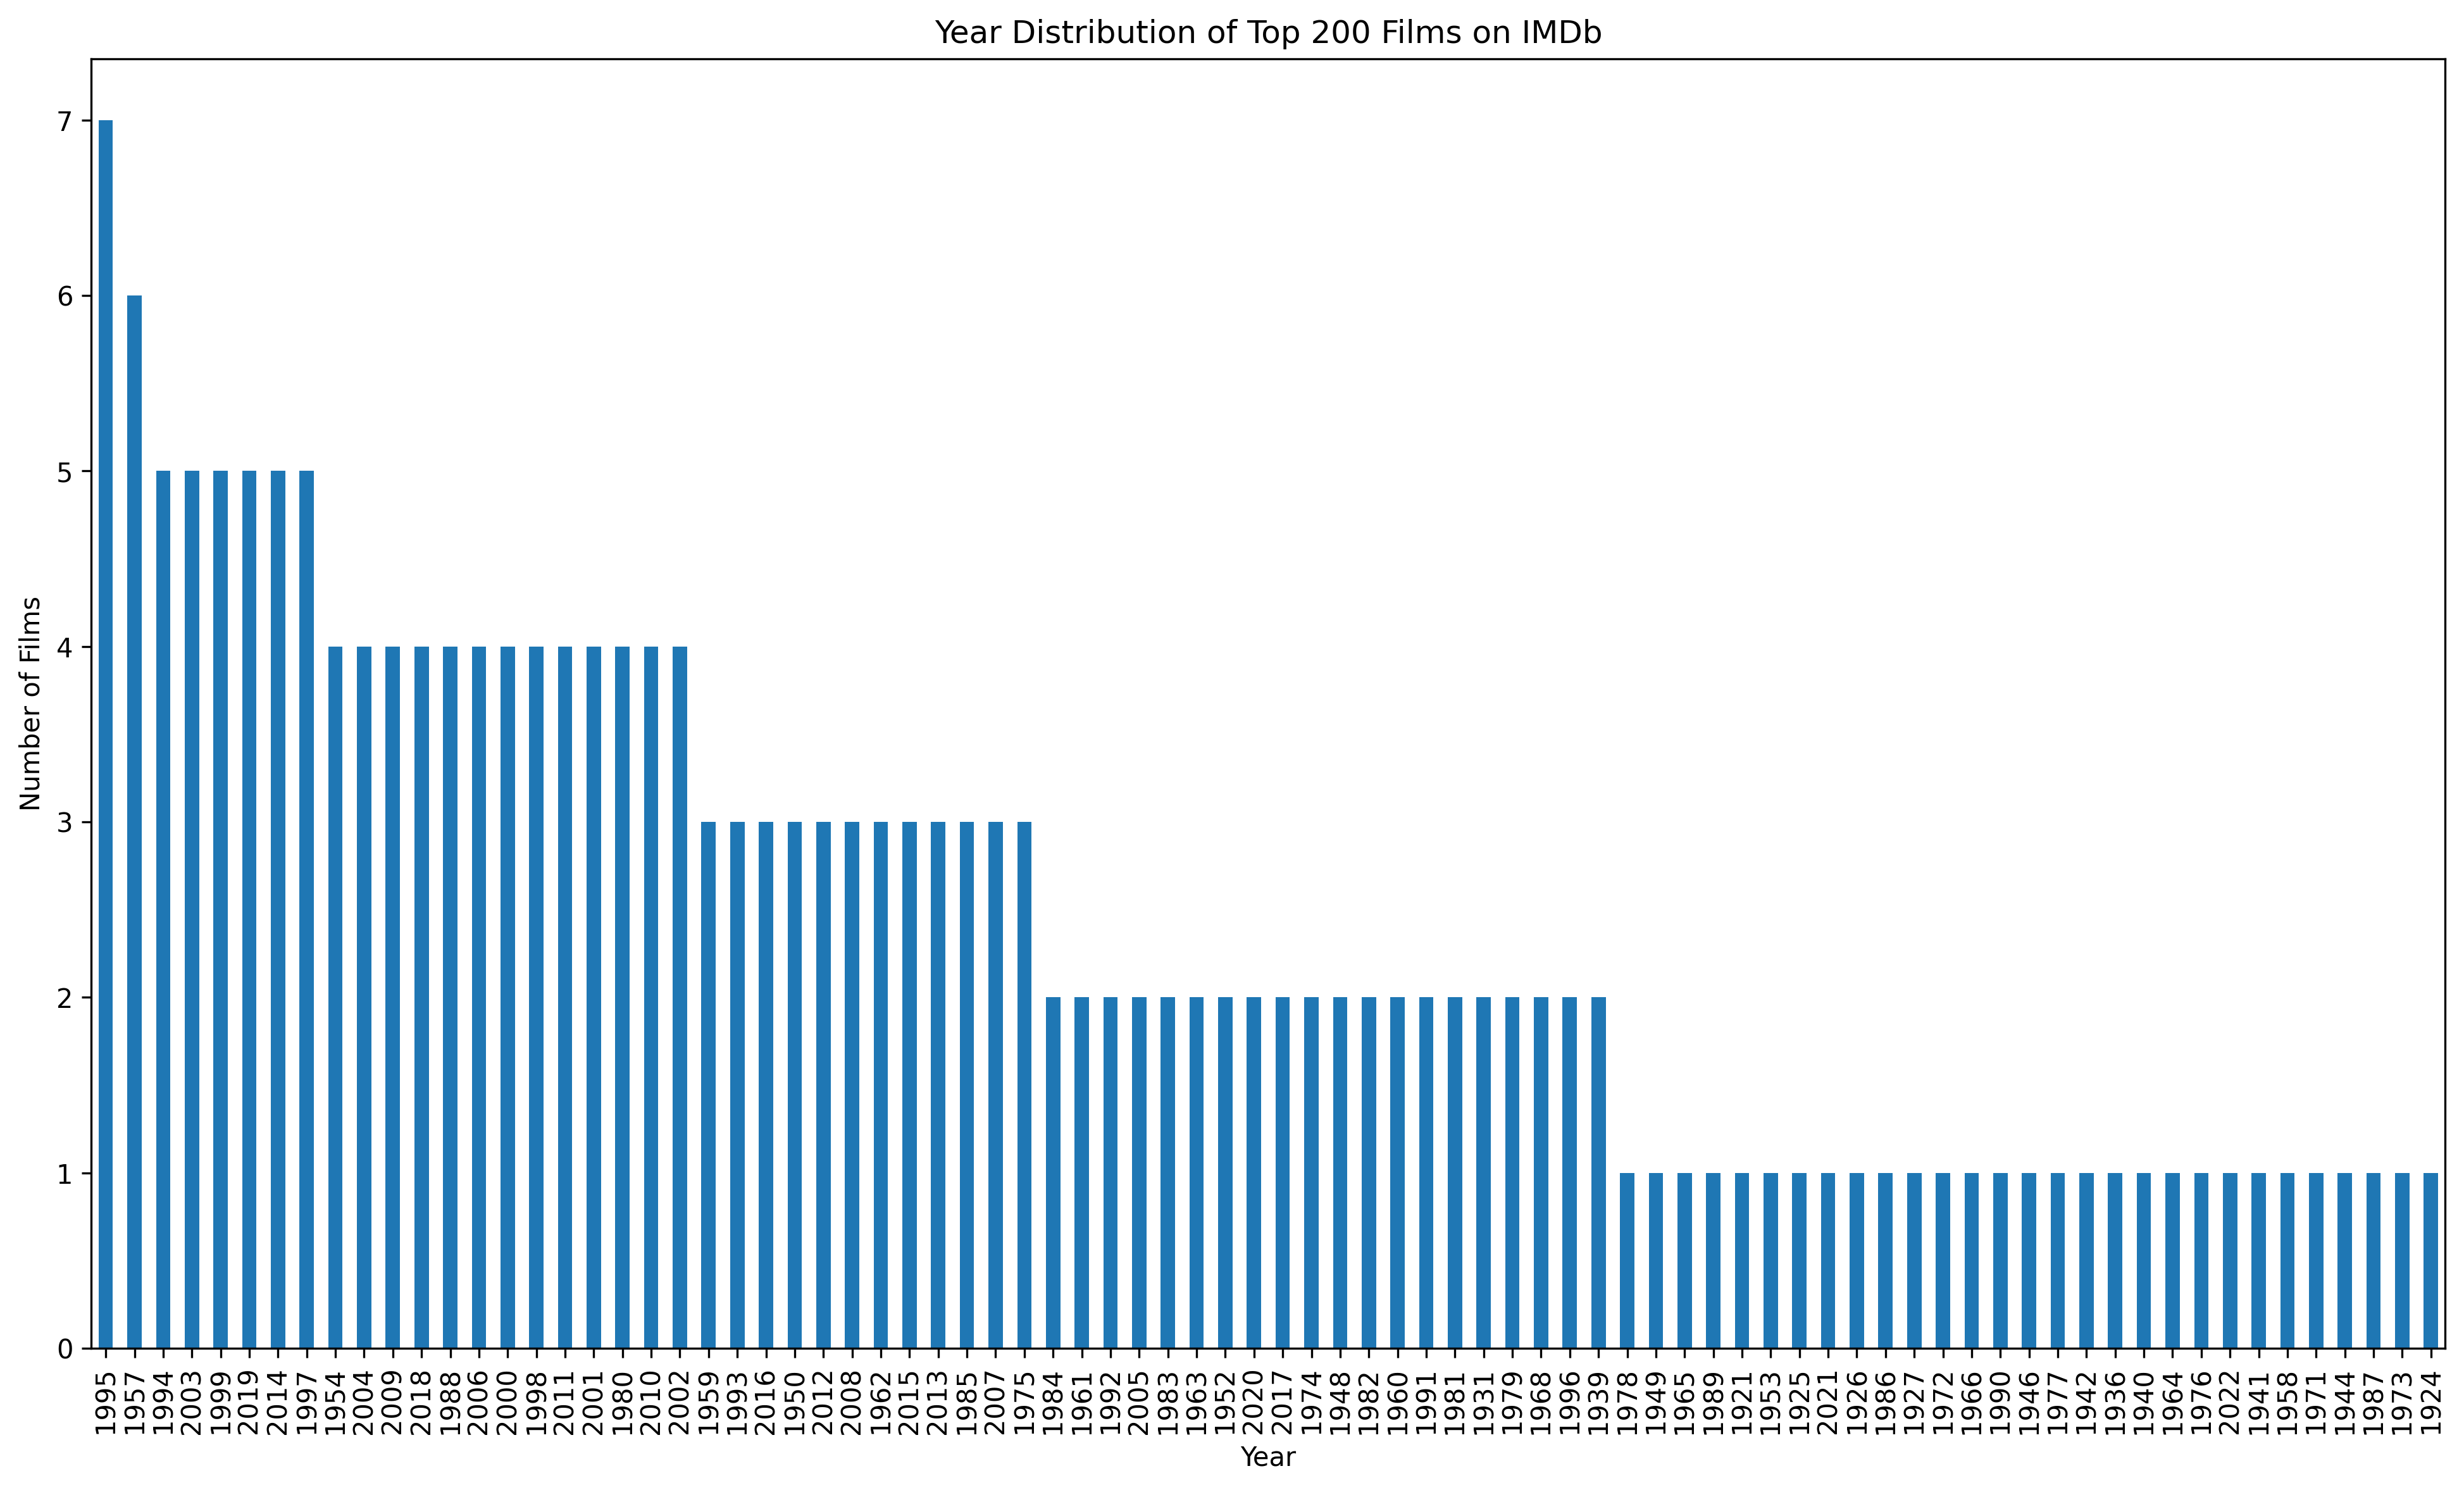

In [4]:
import matplotlib.pyplot as plt



plt.figure(figsize=(16, 9), dpi=300)



# Create a bar chart of the year distribution
df['year'].value_counts().plot(kind='bar')
plt.title('Year Distribution of Top 200 Films on IMDb')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.show()

This will create a bar chart showing the number of films in each year.

We can also use the groupby method to group the films by year and then compute various statistics for each group. For example, to find the average duration for each year, we can do the following:

In [5]:
def convert_duration_to_minutes(duration):
    # Check if the "h" character is present
    if 'h' in duration:
        # Split the duration string by the "h" character
        hours, minutes = duration.split('h')

        # Strip any leading or trailing white space from the strings
        hours = hours.strip()
        minutes = minutes.strip()[:-1]  # Remove the last character from the string

        # Convert the strings to integers
        hours = int(hours)
        minutes = int(minutes) if minutes != '' else 0

        # Convert the hours to minutes and add the minutes
        total_minutes = (hours * 60) + minutes
    elif 'm' in duration:
        # The "h" character is not present, so assume the duration is given in minutes
        total_minutes = int(duration.strip()[:-1])  # Remove the last character from the string
    else:
        # Neither the "h" nor the "m" character is present, so assume the duration is given in hours
        total_minutes = int(duration.strip()) * 60  # Convert the hours to minutes

    return total_minutes


df['duration'] = df['duration'].apply(convert_duration_to_minutes)


df.groupby('year')['duration'].mean()

year
1921     68.0
1924     45.0
1925     95.0
1926     67.0
1927    153.0
        ...  
2018    130.5
2019    130.0
2020    128.5
2021    148.0
2022    130.0
Name: duration, Length: 82, dtype: float64

This will output the average duration for each year.

These are just a few examples of the types of analyses that can be performed on this dataset. I hope you find this notebook helpful as you explore the top 200 films on IMDb!